In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode
from scipy.stats import ttest_ind


In [10]:
#Open the csv file as a dataframe
df = pd.read_csv(r'C:\Users\user\Downloads\archive\StudentsPerformance.csv')


In [12]:
 df.head(10) # display 10 values  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# exploratory data analysis


In [13]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no null values.The dataset has no missing values, the right data types, and a well-organized structure.



In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

The categorical variables, which are represented as "object" data types, are "gender," "race/ethnicity," "parental level of education," "lunch," and "test preparation course." The 'int64' data type is used to represent the numerical variables'math score, reading score, and writing score'.


# Outlier checking


In [16]:
# Assuming df is your DataFrame
numeric_columns = ['math score', 'reading score', 'writing score']

for column in numeric_columns:
    # Calculate mean and standard deviation
    mean, std_dev = df[column].mean(), df[column].std()
    
    # Calculate Z-scores and identify outliers
    z_scores = (df[column] - mean) / std_dev
    outliers = df[abs(z_scores) > 3]
    
    # Print results
    num_outliers = outliers.shape[0]
    print(f"Outliers in {column}:\n{outliers}\nNumber of outliers: {num_outliers}\n")

Outliers in math score:
     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
787  female        group B                some college      standard   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
787                    none          19             38             32  
980                    none           8             24             23  
Number of outliers: 4

Outliers in reading score:
     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
327    male        group A                some college  free/

The given dataset contains columns with student data like gender, race/ethnicity, parental education level, type of lunch, test preparation course, and math, reading, and writing scores. It's crucial to remember that the apparent outliers in the reading, writing, and math scores are actually valid data points and shouldn't be regarded as outliers for a number of reasons.
Students' success in math, reading, and writing is represented by the scores, which are given on a scale from 0 to 100.Students may legitimately have low scores in several areas for a variety of reasons, including personal struggles, exam anxiety, or learning issues. When it comes to educational evaluations, low scores do not always equate to outliers. 


# Data visualization

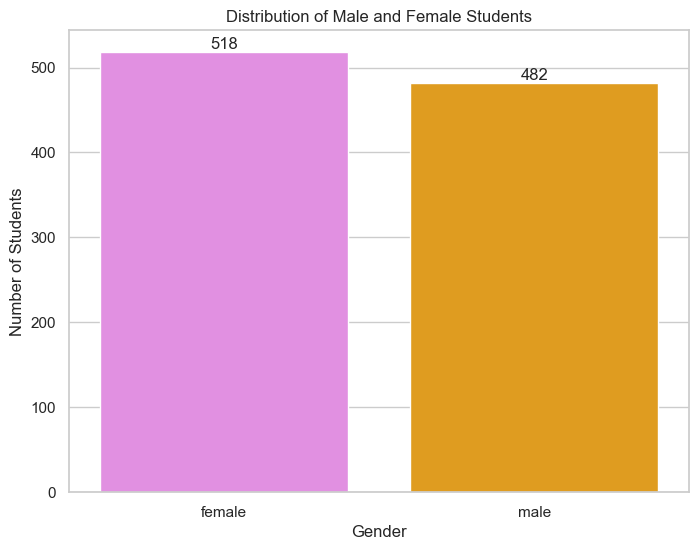

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
gender_distribution = df['gender'].value_counts()

# Set the style
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, palette=['violet', 'orange'])
plt.title('Distribution of Male and Female Students')
plt.xlabel('Gender')
plt.ylabel('Number of Students')

# Adding value labels on top of each bar
for index, value in enumerate(gender_distribution.values):
    plt.text(index, value, round(value, 1), ha='center', va='bottom')

plt.show()


In this barplot, the difference between the number of female and male students is really small so we can say that numbers of male and female are quite same and distributions are balanced.

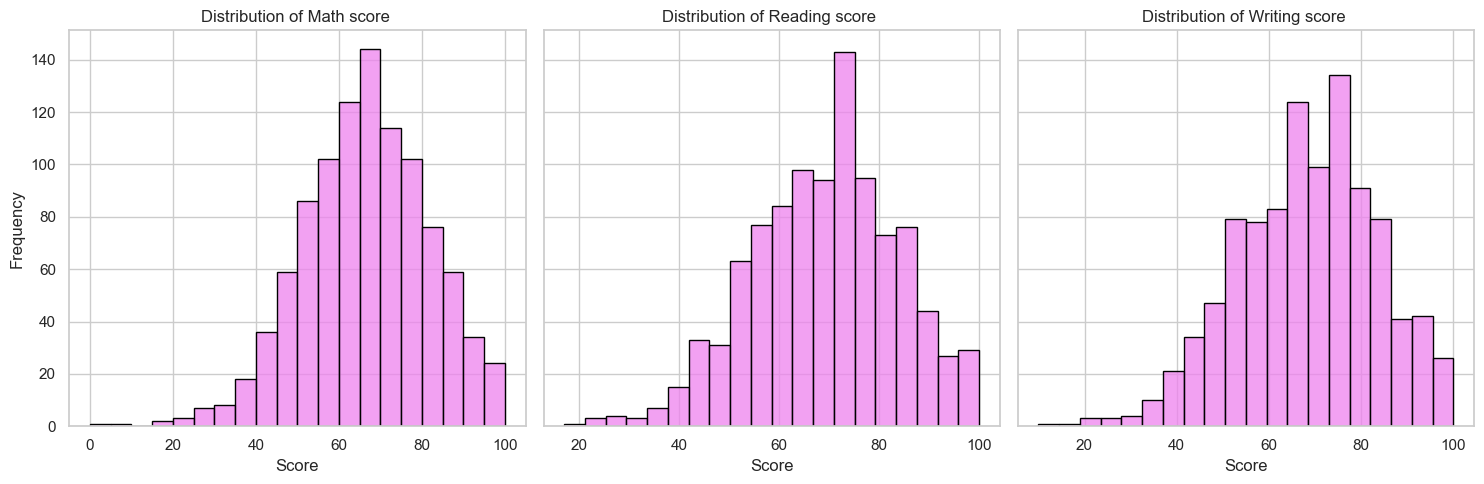

In [22]:
# Plotting histograms
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(15, 5), sharey=True)

for ax, column in zip(axes, numeric_columns):
    sns.histplot(df[column], bins=20, color='violet', edgecolor='black', ax=ax)
    ax.set_title(f'Distribution of {column.capitalize()} ')
    ax.set(xlabel='Score', ylabel='Frequency')

plt.tight_layout()
plt.show()

The dataset's numerical variable histograms exhibit a mixture of symmetric and somewhat left-skewed distributions, pointing to a varied pattern in the data. This suggests that there is a wide range of scores, with some students scoring about average and others scoring significantly below average.


In [23]:

# Assuming df is your DataFrame
columns_of_interest = ['math score', 'reading score', 'writing score', 'gender']

# Create sub dataframe for numerical columns and gender
df_subset = df[columns_of_interest]

# Calculate average scores for each gender
average_scores = df_subset.pivot_table(index='gender', aggfunc='mean')

# Optionally, you can round the values for cleaner output
average_scores = average_scores.round(2)

# Display the result
print(average_scores)


        math score  reading score  writing score
gender                                          
female       63.63          72.61          72.47
male         68.73          65.47          63.31


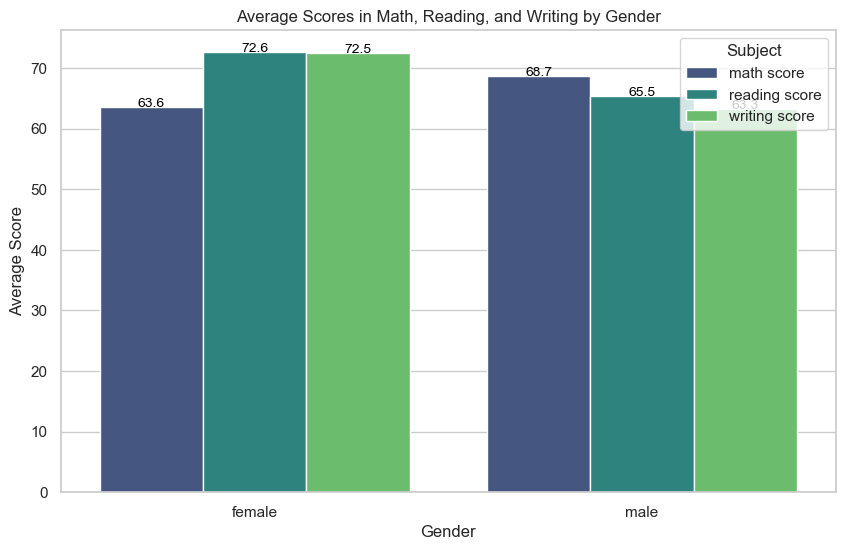

In [24]:
# Assuming df is your DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting using Seaborn
sns.barplot(data=average_scores.reset_index().melt(id_vars='gender'), x='gender', y='value', hue='variable', palette='viridis', ax=ax)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores in Math, Reading, and Writing by Gender')
ax.legend(title='Subject')

plt.show()


Male students score higher on average in math (68.7) than female students  (63.6). Compared to male students (65.5), female students had a better average reading score (72.6). Students who describe as female (72.5) enjoyed slightly higher average writing scores than students who identify as male (63.3).
Gender Comparisons: Male students score better in math on average than female students. When it comes to reading and writing, female students generally perform better than male students.


C:\Users\user\AppData\Local\Temp\ipykernel_16688\3119368447.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col1], y=df[col2], alpha=0.8, ax=ax, palette=cmap)
C:\Users\user\AppData\Local\Temp\ipykernel_16688\3119368447.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col1], y=df[col2], alpha=0.8, ax=ax, palette=cmap)
C:\Users\user\AppData\Local\Temp\ipykernel_16688\3119368447.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col1], y=df[col2], alpha=0.8, ax=ax, palette=cmap)


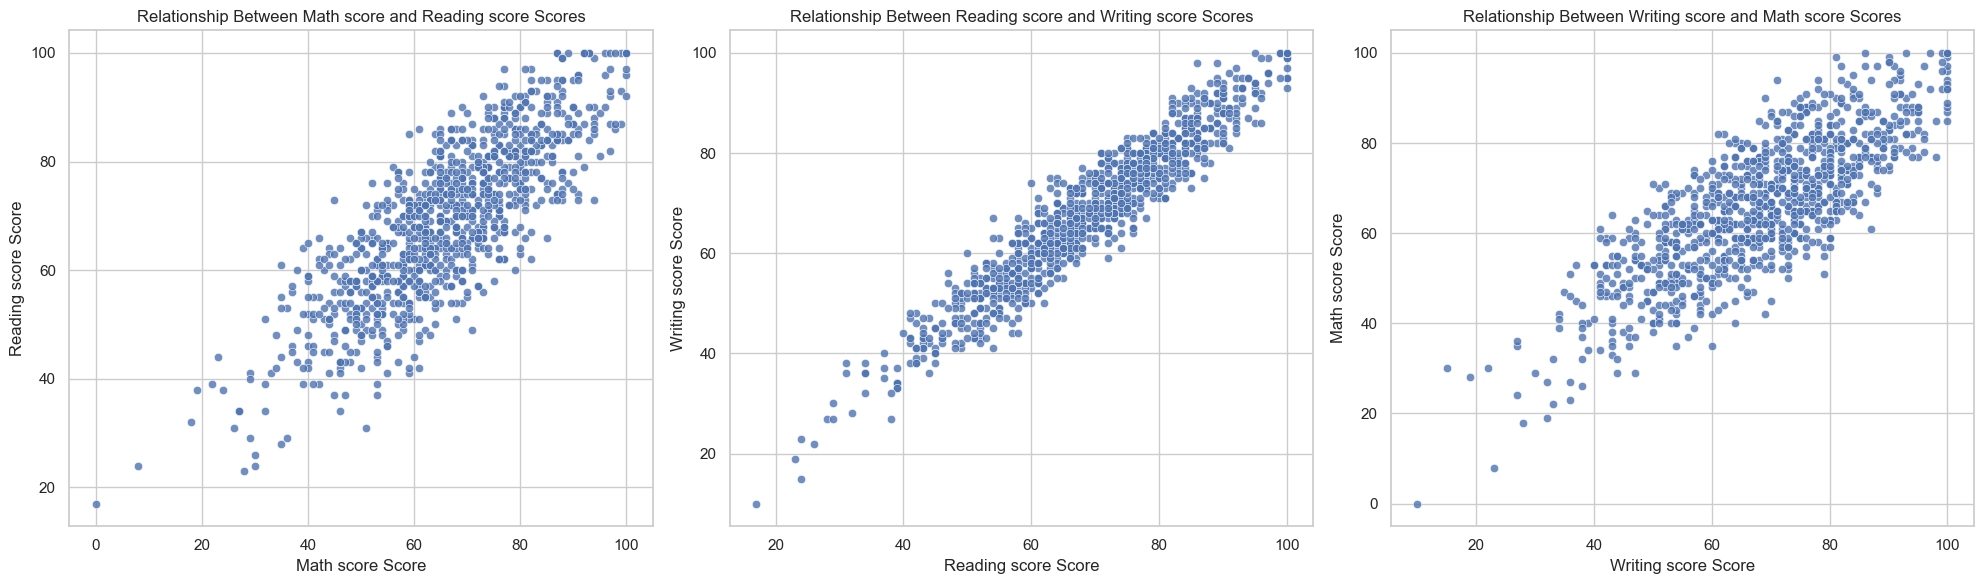

In [26]:
 
# Assuming df is your DataFrame
cmaps = ['viridis', 'plasma', 'inferno']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Loop through combinations of columns
for ax, (col1, col2), cmap in zip(axes, zip(numeric_columns, numeric_columns[1:] + [numeric_columns[0]]), cmaps):
    # Scatter plot using Seaborn
    sns.scatterplot(x=df[col1], y=df[col2], alpha=0.8, ax=ax, palette=cmap)

    # Set labels and title
    ax.set_xlabel(f'{col1.capitalize()} Score')
    ax.set_ylabel(f'{col2.capitalize()} Score')
    ax.set_title(f'Relationship Between {col1.capitalize()} and {col2.capitalize()} Scores')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


General overview:
Plots showing a positive connection all indicate that students who do well in one topic also tend to do well in the other. The degree of variance in the points sheds light on how consistently this relationship holds true. A closer association between the two scores is shown by a narrower spread.


# Statistical analysis

In [27]:
import statistics

# Assuming df is your DataFrame
math_mean = df['math score'].mean()
math_median = df['math score'].median()
math_mode = statistics.mode(df['math score'])

reading_mean = df['reading score'].mean()
reading_median = df['reading score'].median()
reading_mode = statistics.mode(df['reading score'])

writing_mean = df['writing score'].mean()
writing_median = df['writing score'].median()
writing_mode = statistics.mode(df['writing score'])

print(f"Math Scores:\nMean: {math_mean}\nMedian: {math_median}\nMode: {math_mode}\n")
print(f"Reading Scores:\nMean: {reading_mean}\nMedian: {reading_median}\nMode: {reading_mode}\n")
print(f"Writing Scores:\nMean: {writing_mean}\nMedian: {writing_median}\nMode: {writing_mode}\n")


Math Scores:
Mean: 66.089
Median: 66.0
Mode: 65

Reading Scores:
Mean: 69.169
Median: 70.0
Mode: 72

Writing Scores:
Mean: 68.054
Median: 69.0
Mode: 74



In [33]:
# Assuming df is your DataFrame
math_std = df['math score'].std()
reading_std = df['reading score'].std()
writing_std = df['writing score'].std()

print(f"Math Scores Standard Deviation: {math_std:.2f}")
print(f"Reading Scores Standard Deviation: {reading_std:.2f}")
print(f"Writing Scores Standard Deviation: {writing_std:.2f}")


Math Scores Standard Deviation: 15.16
Reading Scores Standard Deviation: 14.60
Writing Scores Standard Deviation: 15.20


In [35]:
from scipy.stats import ttest_ind

# Separate data for male and female students
male_scores = df_subset[df_subset['gender'] == 'male']
female_scores = df_subset[df_subset['gender'] == 'female']

# Perform t-test for each subject and store results in a dictionary
results_dict = {}

for subject in numeric_columns:
    t_statistic, p_value = ttest_ind(male_scores[subject], female_scores[subject])
    
    # Check for significance at a common alpha level (e.g., 0.05)
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    
    # Store results in the dictionary
    results_dict[subject.capitalize()] = {
        "T-statistic": t_statistic,
        "P-value": p_value,
        "Significance": significance
    }

# Display the results
for subject, result in results_dict.items():
    print(f"T-test for {subject} Scores:")
    print(f"T-statistic: {result['T-statistic']:.4f}")
    print(f"P-value: {result['P-value']}")
    print(f"Result: The difference is {result['Significance'].lower()}.\n")



T-test for Math score Scores:
T-statistic: 5.3832
P-value: 9.120185549328822e-08
Result: The difference is significant.

T-test for Reading score Scores:
T-statistic: -7.9593
P-value: 4.680538743933289e-15
Result: The difference is significant.

T-test for Writing score Scores:
T-statistic: -9.9796
P-value: 2.019877706867934e-22
Result: The difference is significant.



Male students' mean math scores are greater than female students', according to the positive t-statistic value. The mean reading and writing scores of male students are lower than those of female students, as indicated by the negative tstatistic value.

Since the p-value is so low—nearing zero—it is highly unlikely that this difference could have happened by accident, which supports the statistical significance of the discrepancy. In conclusion, there is compelling evidence from the t-tests to refute the null hypothesis—that there is no variation in the math, reading, and writing scores of male and female students—that there is. In reading and writing, the negative t-statistic values imply that, on average, female students perform better than male students in these areas where the t-stat for math is totally opposite.